# **LIBRARY IMPORTS**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# **DATA INGESTION AND CLEANING**

In [2]:
sales_data = pd.read_csv("/content/drive/MyDrive/advertising.csv")
sales_data.rename(columns={
    'TV': 'Spend_TV',
    'Radio': 'Spend_Radio',
    'Newspaper': 'Spend_Print',
    'Sales': 'Sales_Units'
}, inplace=True)

In [3]:
sales_data.head()

,Spend_TV,Spend_Radio,Spend_Print,Sales_Units
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Spend_TV     200 non-null    float64
 1   Spend_Radio  200 non-null    float64
 2   Spend_Print  200 non-null    float64
 3   Sales_Units  200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
sales_data.isnull().sum()

,0
Spend_TV,0
Spend_Radio,0
Spend_Print,0
Sales_Units,0


# **EXPLORATORY DATA ANALYSIS & VISUAL INSIGHTS**

***Pairwise Plots***

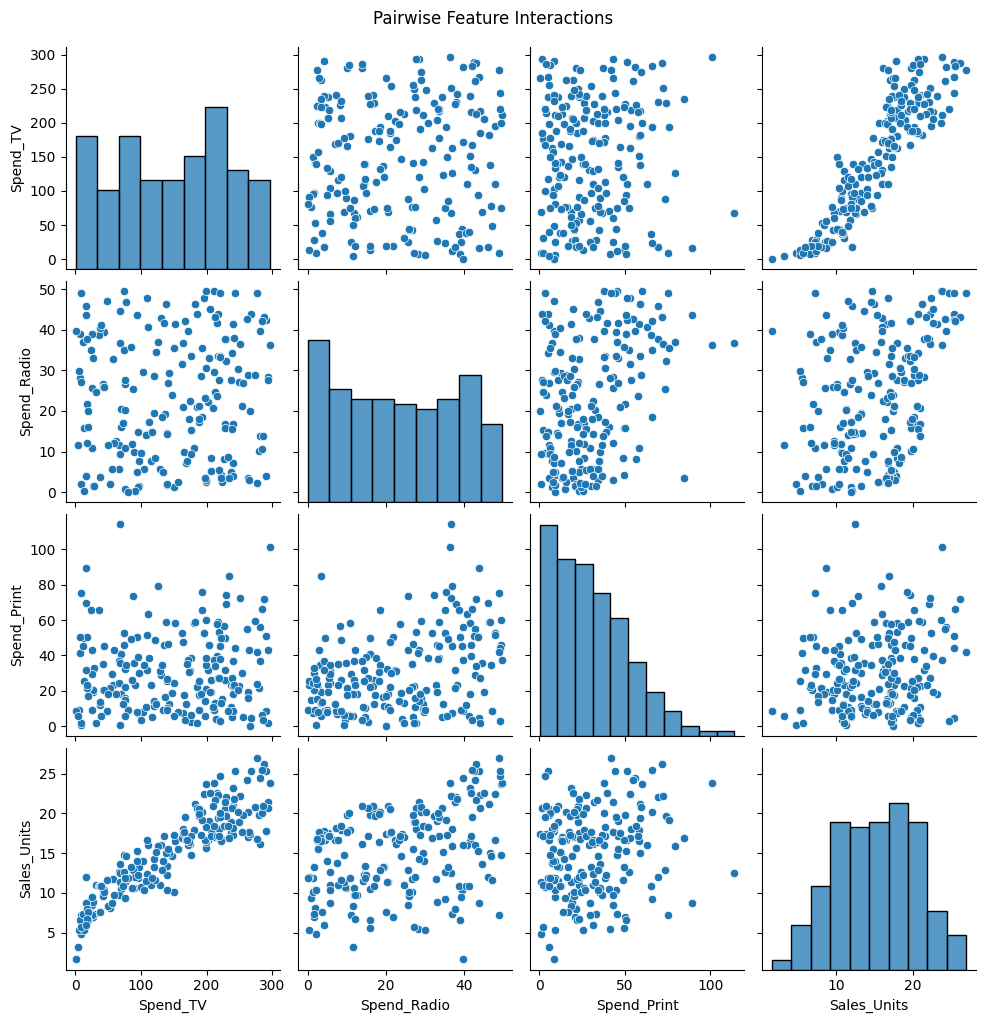

In [6]:
sns.pairplot(sales_data)
plt.suptitle("Pairwise Feature Interactions", y=1.02)
plt.show()

***Distribution of Advertising Spend***

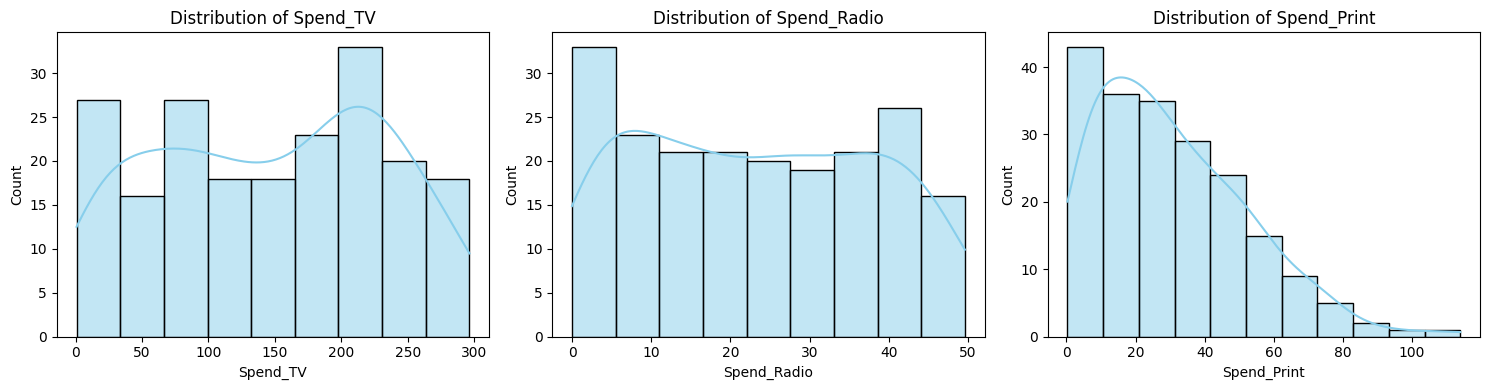

In [7]:
plt.figure(figsize=(15, 4))
for idx, col in enumerate(['Spend_TV', 'Spend_Radio', 'Spend_Print']):
    plt.subplot(1, 3, idx + 1)
    sns.histplot(sales_data[col], kde=True, color='skyblue')
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

***Sales Distribution***

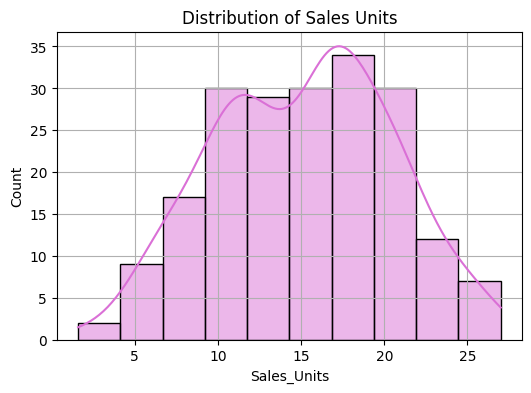

In [8]:
plt.figure(figsize=(6, 4))
sns.histplot(sales_data['Sales_Units'], kde=True, color='orchid')
plt.title("Distribution of Sales Units")
plt.grid(True)
plt.show()

***Sales vs Individual Channels***

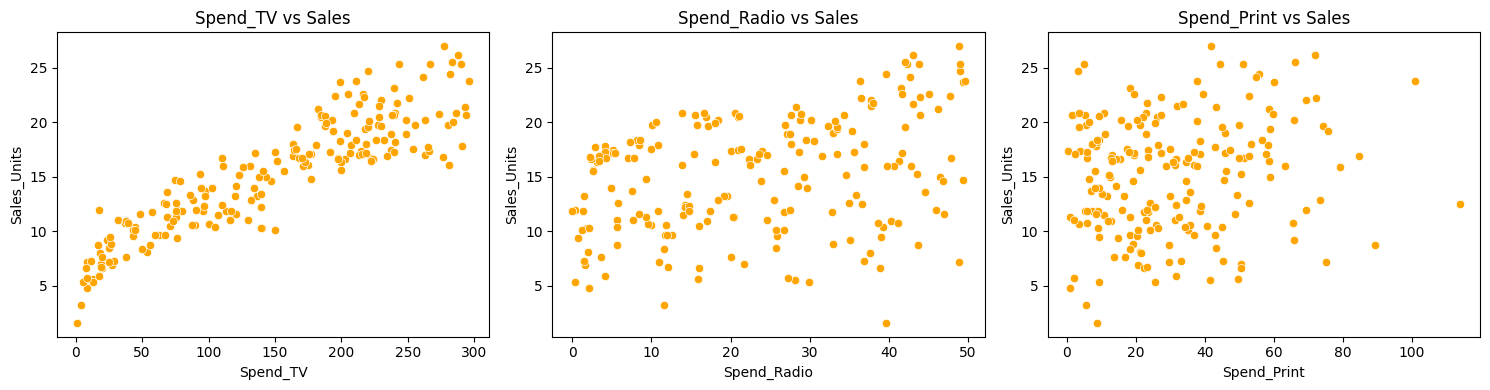

In [9]:
plt.figure(figsize=(15, 4))
for i, col in enumerate(['Spend_TV', 'Spend_Radio', 'Spend_Print']):
    plt.subplot(1, 3, i+1)
    sns.scatterplot(data=sales_data, x=col, y='Sales_Units', color='orange')
    plt.title(f"{col} vs Sales")
plt.tight_layout()
plt.show()

***Heatmap of Feature Correlation***

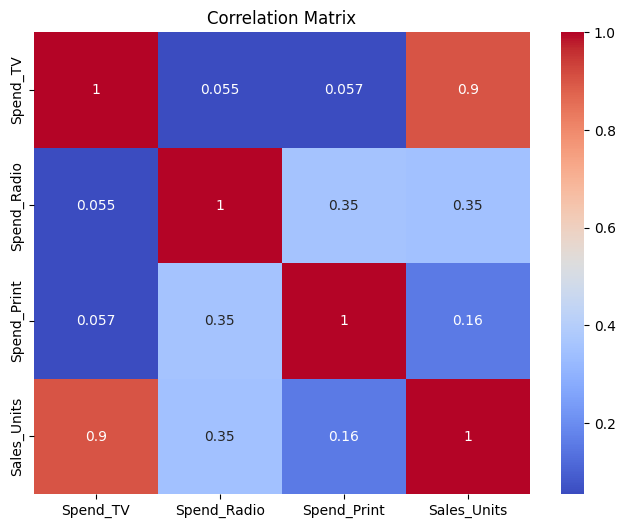

In [10]:
plt.figure(figsize=(8, 6))
sns.heatmap(sales_data.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

# **ADVANCED ANALYTICS**

***Channel-wise Sales Average***

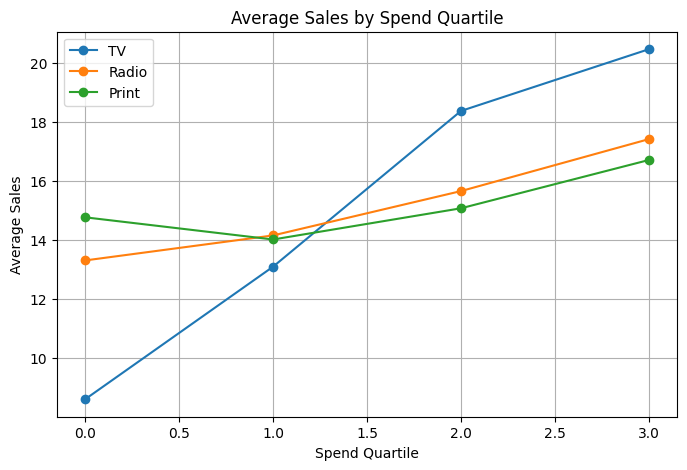

In [11]:
channel_avg_sales = sales_data[['Spend_TV', 'Spend_Radio', 'Spend_Print']].copy()
channel_avg_sales['Average_Sales'] = sales_data['Sales_Units']

mean_tv = channel_avg_sales.groupby(pd.qcut(sales_data['Spend_TV'], 4), observed=False)['Average_Sales'].mean()
mean_radio = channel_avg_sales.groupby(pd.qcut(sales_data['Spend_Radio'], 4), observed=False)['Average_Sales'].mean()
mean_print = channel_avg_sales.groupby(pd.qcut(sales_data['Spend_Print'], 4), observed=False)['Average_Sales'].mean()

plt.figure(figsize=(8, 5))
plt.plot(mean_tv.values, label='TV', marker='o')
plt.plot(mean_radio.values, label='Radio', marker='o')
plt.plot(mean_print.values, label='Print', marker='o')
plt.title("Average Sales by Spend Quartile")
plt.xlabel("Spend Quartile")
plt.ylabel("Average Sales")
plt.legend()
plt.grid(True)
plt.show()


***Total Spend and Top Spenders***

In [12]:
sales_data['Total_Spend'] = sales_data[['Spend_TV', 'Spend_Radio', 'Spend_Print']].sum(axis=1)
top_rows = sales_data.sort_values(by='Total_Spend', ascending=False).head(10)
print(top_rows[['Spend_TV', 'Spend_Radio', 'Spend_Print', 'Total_Spend', 'Sales_Units']])

     Spend_TV  Spend_Radio  Spend_Print  Total_Spend  Sales_Units
101     296.4         36.3        100.9        433.6         23.8
183     287.6         43.0         71.8        402.4         26.2
198     283.6         42.0         66.2        391.8         25.5
98      289.7         42.3         51.2        383.2         25.4
17      281.4         39.6         55.8        376.8         24.4
175     276.9         48.9         41.8        367.6         27.0
30      292.9         28.3         43.2        364.4         21.4
137     273.7         28.9         59.7        362.3         20.8
93      250.9         36.5         72.3        359.7         22.2
61      261.3         42.7         54.7        358.7         24.2


***Boxplot of Spend vs Sales***

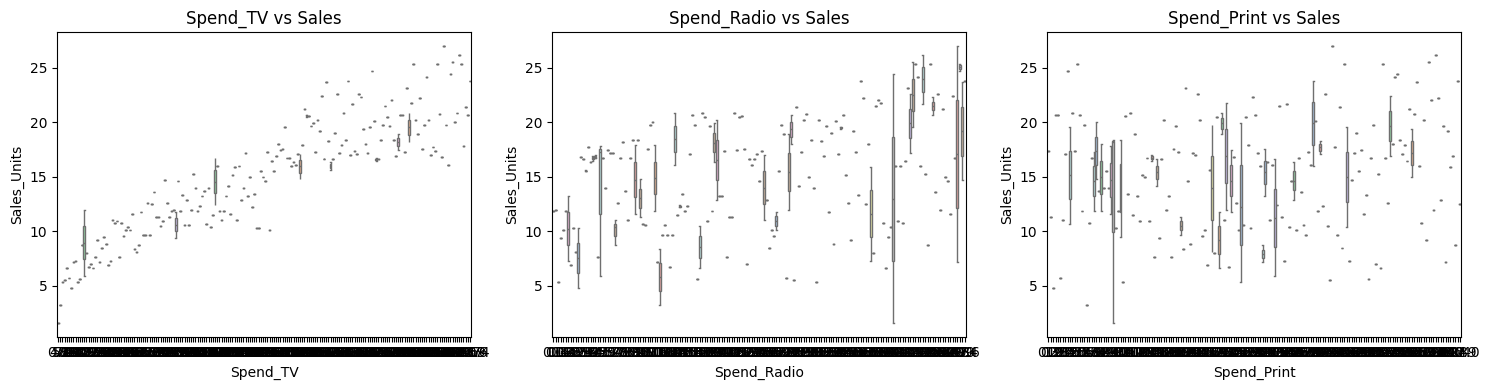

In [13]:
plt.figure(figsize=(15, 4))
for i, feature in enumerate(['Spend_TV', 'Spend_Radio', 'Spend_Print']):
    plt.subplot(1, 3, i+1)
    sns.boxplot(x=sales_data[feature], y=sales_data['Sales_Units'], hue=sales_data[feature], palette='pastel', legend=False)
    plt.title(f"{feature} vs Sales")
plt.tight_layout()
plt.show()


***Outlier Count via IQR***

In [14]:
for feature in ['Spend_TV', 'Spend_Radio', 'Spend_Print']:
    Q1 = sales_data[feature].quantile(0.25)
    Q3 = sales_data[feature].quantile(0.75)
    IQR = Q3 - Q1
    outlier_rows = sales_data[(sales_data[feature] < Q1 - 1.5*IQR) | (sales_data[feature] > Q3 + 1.5*IQR)]
    print(f"{feature}: Outliers = {outlier_rows.shape[0]}")

Spend_TV: Outliers = 0
Spend_Radio: Outliers = 0
Spend_Print: Outliers = 2


***Spend Distribution by Dominant Channel***

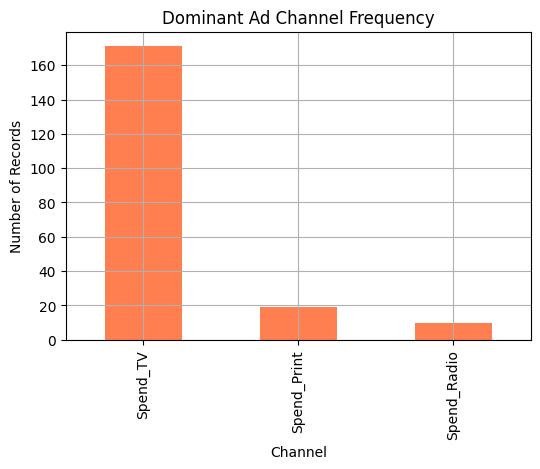

In [15]:
sales_data['Primary_Channel'] = sales_data[['Spend_TV', 'Spend_Radio', 'Spend_Print']].idxmax(axis=1)
channel_usage = sales_data['Primary_Channel'].value_counts()

plt.figure(figsize=(6, 4))
channel_usage.plot(kind='bar', color='coral')
plt.title("Dominant Ad Channel Frequency")
plt.ylabel("Number of Records")
plt.xlabel("Channel")
plt.grid(True)
plt.show()

***Percentage Spend Distribution***

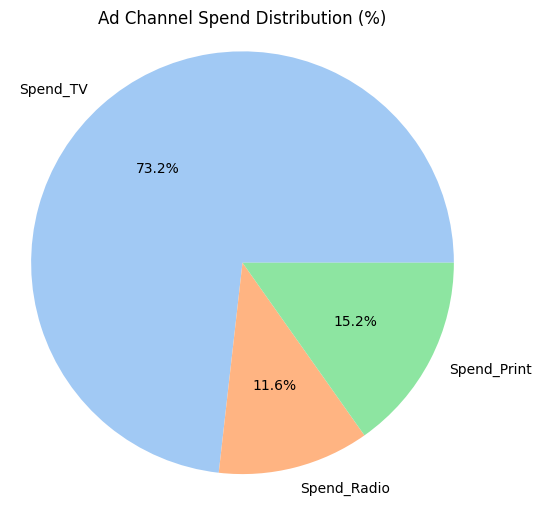

In [16]:
channel_spend_totals = sales_data[['Spend_TV', 'Spend_Radio', 'Spend_Print']].sum()
channel_spend_percent = (channel_spend_totals / channel_spend_totals.sum()) * 100

plt.figure(figsize=(6, 6))
plt.pie(channel_spend_percent, labels=channel_spend_percent.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Ad Channel Spend Distribution (%)')
plt.axis('equal')
plt.show()

# **FEATURE ENGINEERING & MODEL PREPARATION**

In [17]:
X = sales_data[['Spend_TV', 'Spend_Radio', 'Spend_Print']]
y = sales_data['Sales_Units']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# **MODELING**

In [18]:
model = LinearRegression()
model.fit(X_train, y_train)

print("Intercept:", model.intercept_)
print("Coefficients:", dict(zip(X.columns, model.coef_)))


Intercept: 4.741842244124568
Coefficients: {'Spend_TV': np.float64(0.05461383423987013), 'Spend_Radio': np.float64(0.0997594634936156), 'Spend_Print': np.float64(0.004304951015039131)}


# **MODEL EVALUATION**

In [19]:
y_pred = model.predict(X_test)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

MAE: 1.1199940713361773
MSE: 2.404067444711889
R2 Score: 0.9115647723992757


***Residuals Distribution***

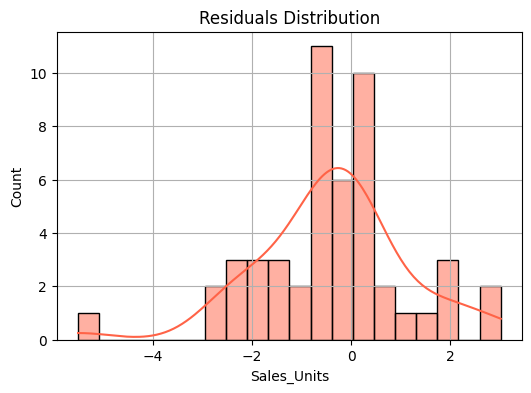

In [20]:
residuals = y_test - y_pred
plt.figure(figsize=(6, 4))
sns.histplot(residuals, bins=20, kde=True, color='tomato')
plt.title("Residuals Distribution")
plt.grid(True)
plt.show()

***Actual vs Predicted Plot***

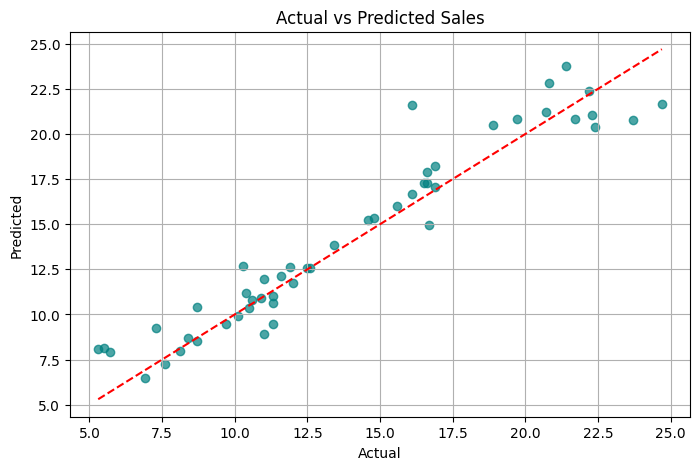

In [21]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.7, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted Sales")
plt.grid(True)
plt.show()

# **FORECASTING**

In [22]:
future_spend = pd.DataFrame([[150, 30, 20]], columns=X.columns)
future_result = model.predict(future_spend)
print("Predicted Units Sold:", future_result[0])


Predicted Units Sold: 16.012800305214338
